# Computer Vision Nanodegree

## Project: Image Captioning

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, you will explore this dataset, in preparation for the project.

## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you will use to obtain the data.

In [ ]:
## Download tools + annotations
!git clone https://github.com/cocodataset/cocoapi.git
!wget -O annotations.zip http://images.cocodataset.org/annotations/annotations_trainval2014.zip
!unzip annotations.zip -d cocoapi/
!rm annotations.zip

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 0 bytes/s, done.
Resolving deltas: 100% (576/576), done.
--2020-06-14 18:36:28--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.186.203
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.186.203|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘annotations.zip’

annotations.zip     100%[===================>] 241.16M  45.2MB/s    in 4.7s    

2020-06-14 18:36:33 (51.6 MB/s) - ‘annotations.zip’ saved [252872794/252872794]

Archive:  annotations.zip
  inflating: cocoapi/annotations/instances_train2014.json  
  inflating: cocoapi/annotations/instances_val2014.json  
  inflating: cocoapi/annotations/person_keypoints_train2014.json  
  inf

In [ ]:
## Also download datasets
!mkdir cocoapi/images/
!wget http://images.cocodataset.org/zips/train2014.zip
!unzip train2014.zip -d cocoapi/images
!rm train2014.zip
!wget http://images.cocodataset.org/zips/val2014.zip
!unzip val2014.zip -d cocoapi/images
!rm val2014.zip
!wget http://images.cocodataset.org/zips/test2014.zip
!unzip test2014.zip -d cocoapi/images
!rm test2014.zip

 extracting: cocoapi/images/test2014/COCO_test2014_000000088585.jpg  
 extracting: cocoapi/images/test2014/COCO_test2014_000000268588.jpg  
 extracting: cocoapi/images/test2014/COCO_test2014_000000186909.jpg  
 extracting: cocoapi/images/test2014/COCO_test2014_000000243633.jpg  
 extracting: cocoapi/images/test2014/COCO_test2014_000000462673.jpg  
 extracting: cocoapi/images/test2014/COCO_test2014_000000210559.jpg  
 extracting: cocoapi/images/test2014/COCO_test2014_000000333932.jpg  
 extracting: cocoapi/images/test2014/COCO_test2014_000000425517.jpg  
 extracting: cocoapi/images/test2014/COCO_test2014_000000549321.jpg  
 extracting: cocoapi/images/test2014/COCO_test2014_000000086246.jpg  
 extracting: cocoapi/images/test2014/COCO_test2014_000000335674.jpg  
 extracting: cocoapi/images/test2014/COCO_test2014_000000044557.jpg  
 extracting: cocoapi/images/test2014/COCO_test2014_000000524827.jpg  
 extracting: cocoapi/images/test2014/COCO_test2014_000000526357.jpg  
 extracting: cocoapi

In [ ]:
## Build the COCO toolset
!pip install cython
!cd cocoapi/PythonAPI && make

python setup.py build_ext --inplace
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
copying build/lib.linux-x86_64-3.7/pycocotools/_mask.cpython-37m-x86_64-linux-gnu.so -> pycocotools
rm -rf build


In [ ]:
## Also install requirements
!pip install -r requirements.txt

In [ ]:
import os
import sys
#sys.path.append('/opt/cocoapi/PythonAPI')
sys.path.append('./cocoapi/PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
#dataDir = '/opt/cocoapi'
dataDir = './cocoapi'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=7.14s)
creating index...
index created!
loading annotations into memory...
Done (t=0.91s)
creating index...
index created!


## Step 2: Plot a Sample Image

Next, we plot a random image from the dataset, along with its five corresponding captions.  Each time you run the code cell below, a different image is selected.  

In the project, you will use this dataset to train your own model to generate captions from images!

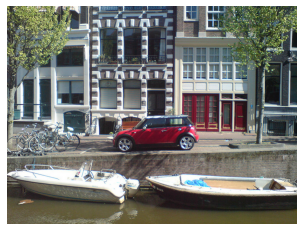

A couple of boats and car on a street.
two small boats in a small body of water 
A couple of small boats parked next to a red car.
A car parked in front of building near boats.
a couple of boats and a red car
http://images.cocodataset.org/val2014/COCO_val2014_000000147576.jpg


In [ ]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
print(url) ## Ray - moved here for display in Deepnote

## Step 3: What's to Come!

In this project, you will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.  You'll learn more about how to design the architecture in the next notebook in the sequence (**1_Preliminaries.ipynb**).

![Image Captioning CNN-RNN model](images/encoder-decoder.png)